<a href="https://colab.research.google.com/github/Aslina-15/Python-Programming/blob/main/Copy_of_29_11_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving asl.xlsx to asl.xlsx
     timestamp  processId  threadId  parentProcessId  userId  mountNamespace  \
0  1809.495787      381.0    7337.0              1.0   100.0    4.026532e+09   
1  1809.495832      381.0    7337.0              1.0   100.0    4.026532e+09   
2  1809.495921      381.0    7337.0              1.0   100.0    4.026532e+09   
3  1894.139651     7347.0    7347.0           7341.0     0.0    4.026532e+09   
4  1894.142127     7347.0    7347.0           7341.0     0.0    4.026532e+09   

  processName         hostName  eventId           eventName  \
0       close  ip-10-100-1-120    157.0               prctl   
1       close  ip-10-100-1-120      3.0               close   
2       close  ip-10-100-1-120   1010.0  sched_process_exit   
3          sh  ip-10-100-1-120     21.0              access   
4          sh  ip-10-100-1-120   1005.0  security_file_open   

                         stackAddresses  argsNum  returnValue  \
0  [140662171848350, 11649800180280676]      5.

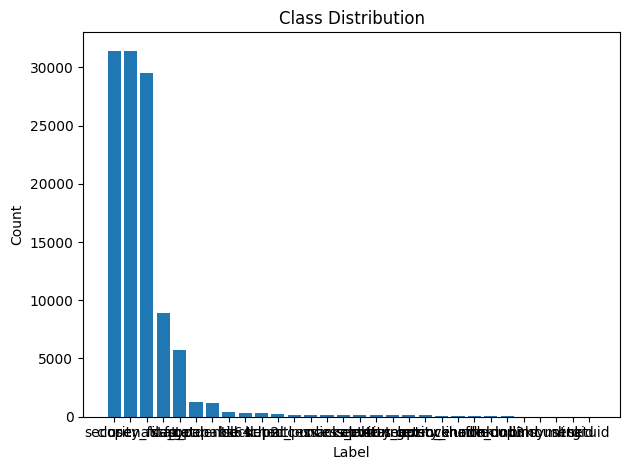

Accuracy: 0.951834145033734
Confusion Matrix:
 [[   0    0    0    0   52    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0 6324    0    0    1    5    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0   33    0    0    0    5    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0   27    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0 5870    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0 6306    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0  526

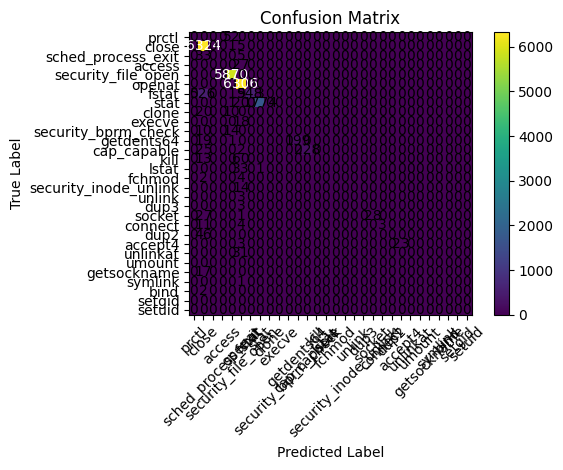

ROC curve skipped (more than 2 classes).


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

print(df.head())
print(df.columns)

# Drop rows where 'eventName' is NaN
df.dropna(subset=['eventName'], inplace=True)

label_counts = df['eventName'].value_counts()
plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

X = df.drop('eventName', axis=1)
y = df['eventName']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert each row of the DataFrame into a single string for TF-IDF vectorization
X_train_text = X_train.astype(str).agg(' '.join, axis=1)
X_test_text = X_test.astype(str).agg(' '.join, axis=1)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

predictions = model.predict(X_test_vec)
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)

def check_spam(msg):
    # The example function check_spam is not relevant for this dataset
    # and would require an actual text input similar to the original problem.
    # For this network traffic dataset, a direct string input is not suitable
    # unless a specific column or combination of columns is treated as text.
    # For demonstration, we'll keep it but acknowledge it's not directly applicable
    # to the current dataset's features unless a similar text transformation is applied.
    # For instance, if 'msg' was a concatenated string of features from a single new flow.
    return "Prediction not applicable to example due to data type mismatch"



cm = confusion_matrix(y_test, predictions, labels=y.unique())
print("Confusion Matrix:\n", cm)

plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45)
plt.yticks(tick_marks, y.unique())

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j],
                 ha="center", va="center",
                 color="white" if cm[i,j] > cm.max()/2 else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

if len(y.unique()) == 2:
    y_test_binary = (y_test == y.unique()[1]).astype(int)
    y_prob = model.predict_proba(X_test_vec)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.3f})")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
else:
    print("ROC curve skipped (more than 2 classes).")